---
## **Climate data from Meteostat**

Project link:

https://meteostat.net

Documentation for Developers:

https://dev.meteostat.net/bulk

---

Meteostat is one of the largest providers of open weather and climate data. The platform provides access to long-term time series of thousands of weather stations and public sources. This allows both developers and end users to access weather and climate data through a single interface.

### 1. Packages

In [38]:
import pandas as pd
import datetime
from meteostat import Point, Daily, Stations
import matplotlib.pyplot as plt

### 2. Set date range and geographical point (Lat, Long in decimal degrees)

Setting Nairobi coords

In [40]:
start = datetime.datetime(1800, 1, 1)
end = datetime.datetime(2024, 6, 30)
location = Point(-1.292239, 36.821918)

The response includes the following properties

In [ ]:
'''
Parameter	Description	Type
date	The date string (YYYY-MM-DD)	String
tavg	The average air temperature in °C	Float
tmin	The minimum air temperature in °C	Float
tmax	The maximum air temperature in °C	Float
prcp	The daily precipitation total in mm	Float
snow	The maximum snow depth in mm	Integer
wdir	The average wind direction in degrees (°)	Integer
wspd	The average wind speed in km/h	Float
wpgt	The peak wind gust in km/h	Float
pres	The average sea-level air pressure in hPa	Float
tsun	The daily sunshine total in minutes (m)	Integer
'''

In [47]:
data = Daily(location, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1957-01-01,17.9,15.0,25.0,NaN,NaN,43.0,17.0,NaN,NaN,NaN
1957-01-02,17.9,15.0,25.0,NaN,NaN,40.0,17.0,NaN,NaN,NaN
1957-01-03,16.3,15.0,23.9,NaN,NaN,52.0,16.0,NaN,NaN,NaN
1957-01-04,15.3,13.9,21.7,NaN,NaN,53.0,14.0,NaN,NaN,NaN
1957-01-05,17.9,13.9,24.4,NaN,NaN,39.0,15.4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-06-26,17.2,11.0,22.0,0.0,NaN,7.0,5.6,NaN,1023.2,NaN
2024-06-27,16.4,14.0,21.0,0.1,NaN,34.0,7.2,NaN,1024.7,NaN
2024-06-28,16.3,11.0,21.6,0.1,NaN,8.0,3.8,NaN,1024.5,NaN


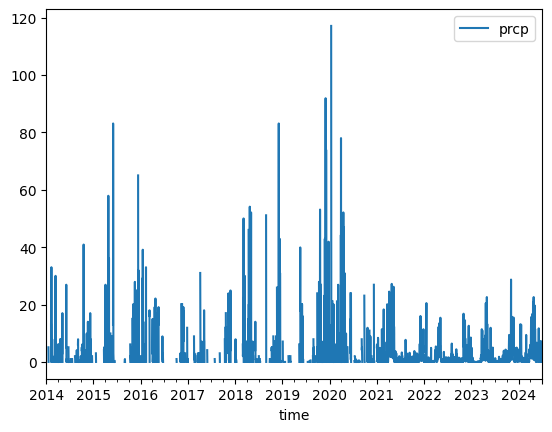

In [52]:
data = Daily(location, start='2014-01-01', end=end)
data = data.fetch()
data.plot(y='prcp')
plt.show()

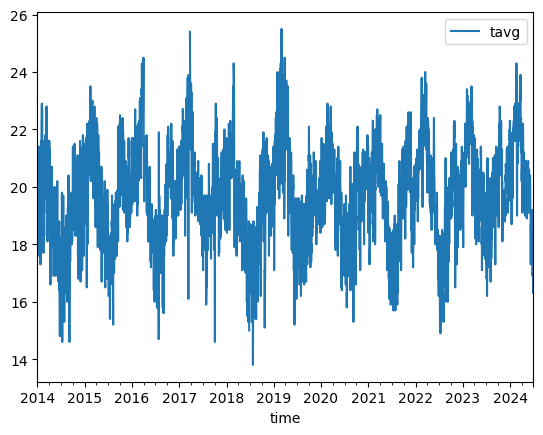

In [51]:
data = Daily(location, start='2014-01-01', end=end)
data = data.fetch()
data.plot(y='tavg')
plt.show()

We can also check which stations are nearby our coords. Set number in fetch to filter how many stations to show.

In [55]:
stations = Stations()
stations = stations.nearby(-1.292239, 36.821918)
station = stations.fetch(3)

station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
63742,Nairobi / Wilson,KE,<NA>,63742,HKNW,-1.3167,36.8167,1683.0,Africa/Nairobi,1963-03-16,2024-07-29,1997-01-25,2022-04-22,NaT,NaT,2781.104786
HKRE0,Nairobi / Doonholm,KE,<NA>,<NA>,HKRE,-1.2773,36.8623,1626.0,Africa/Nairobi,2001-07-29,2017-07-27,2011-07-05,2015-06-13,NaT,NaT,4786.628190
63741,Nairobi / Dagoretti,KE,<NA>,63741,HKNC,-1.3000,36.7500,1798.0,Africa/Nairobi,1957-01-01,2024-07-02,1957-01-01,2024-07-26,1957-01-01,2021-01-01,8041.311960
